In [1]:
import os#list the files
import pandas as pd
filelist = os.listdir('Train_tsk_02') #read them into pandas
train_df = pd.DataFrame(filelist)
filelist2=os.listdir('Test_tsk_02')
test_df=pd.DataFrame(filelist2)
filelist1=os.listdir('Val_tsk_02')
val_df=pd.DataFrame(filelist1)
# Renaming the column name to file
train_df = train_df.rename(columns={0:'file'})
test_df = test_df.rename(columns={0:'file'})
val_df=val_df.rename(columns={0:'file'})
df=train_df
df2=test_df
df1=val_df

In [2]:
speaker = []
for i in range(0, len(df)):
    speaker.append(df['file'][i].split('_')[0])# We now assign the speaker to a new column 
train_df['speaker'] = speaker
speaker2 = []
for i in range(0, len(df2)):
    speaker2.append(df2['file'][i].split('_')[0])# We now assign the speaker to a new column 
test_df['speaker'] = speaker2
speaker1 = []
for i in range(0, len(df1)):
    speaker1.append(df1['file'][i].split('_')[0])# We now assign the speaker to a new column 
val_df['speaker'] = speaker1

In [3]:
train_df.head()

,file,speaker
0,2_mal1.wav,2
1,4_nm5.wav,4
2,1_vs5.wav,1
3,4_nm4.wav,4
4,2_mal3.wav,2


In [4]:
test_df.head()

,file,speaker
0,2_Jaya mala.wav,2
1,4_rahoof_nedumudi.wav,4
2,3_art1_pm.wav,3
3,1_art5_vs.wav,1
4,1_vs2.wav,1


In [5]:
val_df.head()

,file,speaker
0,4_nm8.wav,4
1,4_nm7.wav,4
2,3_pm7.wav,3
3,2_mal7.wav,2
4,4_nm9.wav,4


In [6]:
speaker1

['4', '4', '3', '2', '4', '1', '2', '1']

In [7]:
import librosa
speaker2


['2',
 '4',
 '3',
 '1',
 '1',
 '2',
 '1',
 '3',
 '3',
 '2',
 '3',
 '2',
 '2',
 '4',
 '4',
 '1',
 '4',
 '2',
 '2',
 '3',
 '2',
 '4',
 '2',
 '1',
 '1',
 '2']

In [8]:
import numpy as np
speaker

['2',
 '4',
 '1',
 '4',
 '2',
 '1',
 '3',
 '3',
 '4',
 '3',
 '3',
 '2',
 '2',
 '4',
 '2',
 '1',
 '3',
 '1',
 '3',
 '2',
 '1',
 '4',
 '1',
 '1',
 '4']

In [9]:

def extract_features(files):
    
    # Sets the name to be the path to where the file is in my computer
    file_name = os.path.join(os.path.abspath('Train_tsk_02')+'/'+str(files.file))# Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')# Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)# Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))# Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)# Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Computes spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)# Computes the tonal centroid features (tonnetz)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs, chroma, mel, contrast, tonnetz
    
train_features = train_df.apply(extract_features, axis=1)    


/tmp/ipykernel_87882/3830275565.py:10: FutureWarning: Pass y=[-0.00395693  0.00430673  0.00442854 ...  0.13893802  0.12695152
  0.10859206] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Computes spectral contrast
/tmp/ipykernel_87882/3830275565.py:10: FutureWarning: Pass y=[ 0.00278847  0.00465902  0.0039425  ... -0.0055434  -0.00528405
 -0.00513879] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Computes spectral contrast
/tmp/ipykernel_87882/3830275565.py:10: FutureWarning: Pass y=[-0.18146926 -0.2872907  -0.22465798 ...  0.5970231   0.5944953
  0.54136723] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Compu

In [10]:
def extract_features(files):
    
    # Sets the name to be the path to where the file is in my computer
    file_name = os.path.join(os.path.abspath('Test_tsk_02')+'/'+str(files.file))# Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')# Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)# Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))# Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)# Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Computes spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)# Computes the tonal centroid features (tonnetz)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs, chroma, mel, contrast, tonnetz
    
test_features = test_df.apply(extract_features, axis=1)


/tmp/ipykernel_87882/1325559110.py:10: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00210798 -0.00274357
 -0.00191265] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Computes spectral contrast
/tmp/ipykernel_87882/1325559110.py:10: FutureWarning: Pass y=[-0.00110794 -0.00091077 -0.00068095 ...  0.00081746  0.00046952
  0.00020317] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Computes spectral contrast
/tmp/ipykernel_87882/1325559110.py:10: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.7948894e-05
 -1.0739780e-06  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rat

In [11]:
def extract_features(files):
    
    # Sets the name to be the path to where the file is in my computer
    file_name = os.path.join(os.path.abspath('Val_tsk_02')+'/'+str(files.file))# Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')# Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)# Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))# Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)# Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Computes spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)# Computes the tonal centroid features (tonnetz)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
    return mfccs, chroma, mel, contrast, tonnetz
    
    
val_features = val_df.apply(extract_features, axis=1)


/tmp/ipykernel_87882/79722942.py:10: FutureWarning: Pass y=[0.00826746 0.01272982 0.01416377 ... 0.01932999 0.0196713  0.0228239 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Computes spectral contrast
/tmp/ipykernel_87882/79722942.py:10: FutureWarning: Pass y=[0.14359905 0.21099286 0.12908211 ... 0.00588157 0.0043386  0.0014849 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Computes spectral contrast
/tmp/ipykernel_87882/79722942.py:10: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.7238713e-05 3.4332479e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)# Computes spe

In [12]:
train_features

0     ([-302.51532, 113.29052, -5.980999, 28.466148,...
1     ([-296.84406, 147.44742, -11.9422865, 20.51803...
2     ([-172.47786, 148.1419, -12.265206, 27.499382,...
3     ([-315.91248, 140.46352, -13.7912445, 17.46758...
4     ([-252.82988, 112.37612, -15.73114, 34.695553,...
5     ([-396.40842, 131.53032, -6.947363, 15.251062,...
6     ([-383.93015, 107.6126, 3.7933033, 54.06047, 3...
7     ([-335.8293, 124.63711, -18.320879, 56.38338, ...
8     ([-222.51923, 134.20425, -18.801634, 27.901398...
9     ([-244.94543, 137.07784, -67.68535, 52.761814,...
10    ([-252.91054, 156.30412, -52.97751, 46.302174,...
11    ([-307.89395, 149.20522, -16.961363, 12.784952...
12    ([-314.38187, 148.60289, -11.29937, 11.995213,...
13    ([-259.5583, 128.84274, -12.7827635, 32.74388,...
14    ([-327.57507, 143.17505, -10.26087, 8.825883, ...
15    ([-413.0789, 105.66757, 0.4095446, 14.672372, ...
16    ([-270.57434, 155.57207, -45.016407, 50.508617...
17    ([-148.96867, 106.68537, -55.59443, 20.968

In [13]:
test_features

0     ([-198.3375, 97.38075, -20.189274, 50.114914, ...
1     ([-405.49313, 121.53607, -32.309875, 50.156746...
2     ([-484.37802, 88.46102, -17.80399, 32.54975, -...
3     ([-450.58047, 85.70086, -4.310388, 31.678497, ...
4     ([-396.4151, 131.53806, -6.951325, 15.253556, ...
5     ([-269.29453, 107.397156, -10.782692, 38.34937...
6     ([-399.82098, 110.59521, -0.15341415, 45.17194...
7     ([-393.36017, 141.05603, -35.211067, 66.63533,...
8     ([-399.02682, 89.62135, -14.853022, 27.126705,...
9     ([-259.81, 77.29345, -5.913229, 25.857035, -9....
10    ([-291.35397, 136.03284, -42.365967, 20.65278,...
11    ([-444.26813, 74.42066, -8.745711, 37.89542, -...
12    ([-445.71524, 93.58058, -8.575801, 25.137274, ...
13    ([-211.0213, 90.198166, -16.73233, 35.598217, ...
14    ([-302.07715, 101.039024, -39.73511, 61.55639,...
15    ([-154.32672, 123.18173, -38.126648, 52.642212...
16    ([-166.02466, 93.64375, -23.539934, 48.88817, ...
17    ([-431.9502, 77.21418, -15.654656, 19.2996

In [14]:
features_train = []
for i in range(0, len(train_features)):
    features_train.append(np.concatenate((
        train_features[i][0],
        train_features[i][1], 
        train_features[i][2], 
        train_features[i][3],
        train_features[i][4]), axis=0))

In [15]:
features_test = []
for i in range(0, len(test_features)):
    features_test.append(np.concatenate((
        test_features[i][0],
        test_features[i][1], 
        test_features[i][2], 
        test_features[i][3],
        test_features[i][4]), axis=0))      

In [16]:
features_val = []
for i in range(0, len(val_features)):
    features_val.append(np.concatenate((
        val_features[i][0],
        val_features[i][1], 
        val_features[i][2], 
        val_features[i][3],
        val_features[i][4]), axis=0))

In [17]:
features_train

[array([-3.02515320e+02,  1.13290520e+02, -5.98099899e+00,  2.84661484e+01,
        -6.72380829e+00,  1.14554081e+01, -8.83411217e+00, -1.02206841e+01,
        -1.78494707e-01, -1.09820671e+01,  1.26880753e+00,  2.80578285e-01,
        -5.96973753e+00, -3.34116459e-01,  4.08307835e-02, -5.62877607e+00,
        -3.74580884e+00, -2.81183672e+00, -3.51574421e+00, -5.51358414e+00,
        -1.85281658e+00, -3.45688891e+00, -4.23614836e+00, -3.93069792e+00,
        -2.89401388e+00, -1.95360339e+00, -7.77620411e+00, -1.30147624e+00,
        -3.62304378e+00, -4.42826080e+00, -1.20582259e+00, -3.04474950e+00,
        -1.40072334e+00, -1.70686817e+00,  3.03140134e-01, -1.83104348e+00,
         9.73845124e-01,  1.46336901e+00, -8.07916760e-01,  2.45434904e+00,
         5.38517654e-01,  5.80161572e-01,  5.96494913e-01,  5.83629012e-01,
         5.67360282e-01,  5.44065773e-01,  5.01053631e-01,  4.96854007e-01,
         5.05532682e-01,  5.00759840e-01,  4.95559096e-01,  4.97448981e-01,
         5.7

In [18]:
features_test

[array([-1.98337494e+02,  9.73807526e+01, -2.01892738e+01,  5.01149139e+01,
        -3.22690887e+01,  2.39759083e+01, -1.27000284e+01, -7.45737791e+00,
        -3.68904567e+00, -9.46443081e+00,  3.00283694e+00, -1.18624363e+01,
         3.75347018e+00, -7.38840199e+00,  1.62853754e+00, -2.06408048e+00,
        -2.55805230e+00, -6.46627724e-01, -2.41310310e+00,  3.04133564e-01,
        -4.19234753e+00,  6.72397614e-01, -4.07307863e+00,  3.57185602e-01,
        -1.81568849e+00, -8.79471838e-01, -1.80148375e+00, -2.04747391e+00,
        -3.79232943e-01, -3.24142218e+00,  1.12378001e+00, -3.42264152e+00,
         3.00458563e-03, -1.29117656e+00, -1.36690974e+00,  3.16689342e-01,
        -1.72335911e+00,  1.20908451e+00, -5.22072494e-01,  2.81521082e-01,
         5.78426540e-01,  5.88614285e-01,  5.88874817e-01,  5.86082518e-01,
         6.03809536e-01,  6.25140011e-01,  6.11574113e-01,  5.94826758e-01,
         5.92847049e-01,  6.02618456e-01,  5.91949522e-01,  5.65858245e-01,
         7.4

In [19]:
X_train = np.array(features_train)
X_test = np.array(features_test)

X_val = np.array(features_val)

y_train = np.array(train_df['speaker'])
y_val = np.array(val_df['speaker'])
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical# Hot encoding y
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_val = to_categorical(lb.fit_transform(y_val))


2022-12-17 22:09:47.529853: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)


In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping# Build a simple dense model with early stopping and softmax for categorical classification, remember we have 30 classes
model = Sequential()
model.add(Dense(193, input_shape=(193,), activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')
model.summary()


2022-12-17 22:09:58.075713: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-17 22:09:58.076613: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 193)               37442     
                                                                 
 dropout (Dropout)           (None, 193)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               24832     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 5

In [22]:

history = model.fit(X_train, y_train, batch_size=256, epochs=100, 
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])
          

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.5862 - accuracy: 0.3600 - val_loss: 1.2341 - val_accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 190ms/step - loss: 1.5269 - accuracy: 0.3200 - val_loss: 1.1232 - val_accuracy: 0.7500
Epoch 3/100
1/1 [==============================] - 0s 142ms/step - loss: 1.3499 - accuracy: 0.3200 - val_loss: 1.0314 - val_accuracy: 0.7500
Epoch 4/100
1/1 [==============================] - 0s 129ms/step - loss: 1.1744 - accuracy: 0.5200 - val_loss: 0.9499 - val_accuracy: 0.8750
Epoch 5/100
1/1 [==============================] - 0s 139ms/step - loss: 1.2683 - accuracy: 0.4800 - val_loss: 0.8721 - val_accuracy: 0.8750
Epoch 6/100
1/1 [==============================] - 0s 198ms/step - loss: 1.0035 - accuracy: 0.6400 - val_loss: 0.7932 - val_accuracy: 0.8750
Epoch 7/100
1/1 [==============================] - 0s 120ms/step - loss: 0.9681 - accuracy: 0.6000 - val_loss: 0.7203 - val_accuracy: 1.0000
Epoch 8/100
1/1 

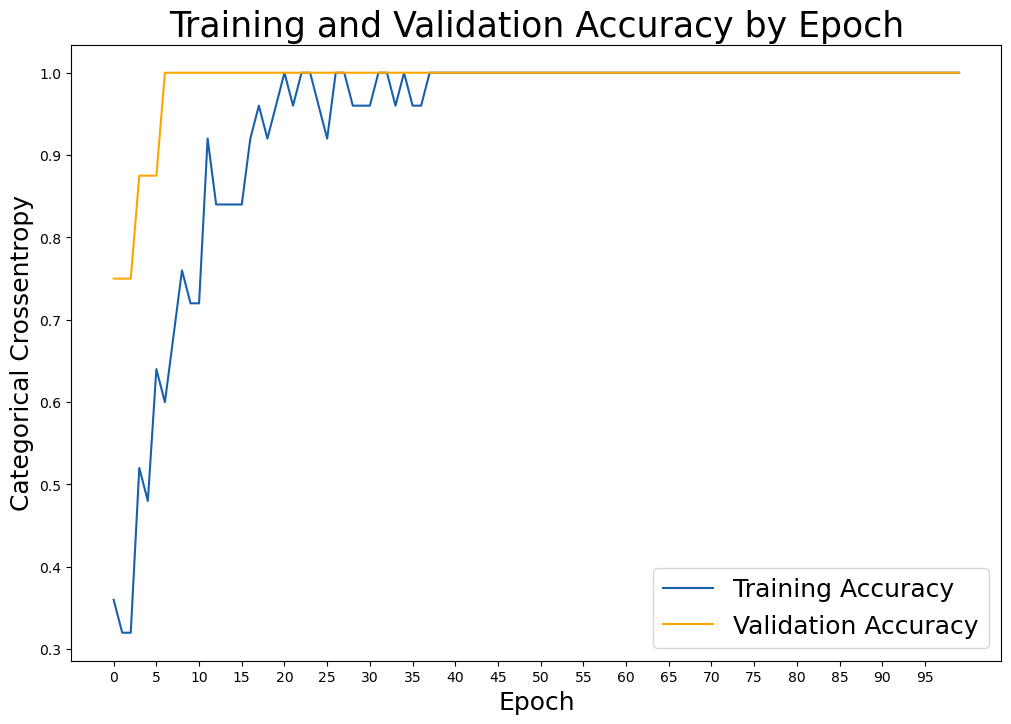

In [23]:
          
import matplotlib.pyplot as plt

# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']# Set figure size.
plt.figure(figsize=(12, 8))# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))
plt.legend(fontsize = 18);


In [24]:
X_test
predict_x=model.predict(X_test) 
predictions=np.argmax(predict_x,axis=1)


1/1 [==============================] - 0s 111ms/step


In [25]:
predict_x

array([[1.00000000e+00, 5.69134251e-09, 1.20013643e-09, 9.14441117e-14],
       [7.91204274e-01, 1.16374157e-01, 1.96728613e-02, 7.27486983e-02],
       [9.99942422e-01, 3.35929258e-06, 1.76021240e-05, 3.65329142e-05],
       [9.96973991e-01, 7.17039120e-06, 2.10915506e-03, 9.09595285e-04],
       [9.99994636e-01, 1.83093914e-06, 1.77711513e-06, 1.77428035e-06],
       [3.28334909e-06, 8.11365464e-09, 9.87037897e-01, 1.29587995e-02],
       [6.36758983e-01, 2.36819535e-01, 7.07998797e-02, 5.56215681e-02],
       [1.83859302e-05, 5.34045284e-05, 9.53278005e-01, 4.66501676e-02],
       [9.99797881e-01, 1.93435917e-05, 1.19920369e-04, 6.28547277e-05],
       [1.00000000e+00, 3.07413482e-16, 2.02884693e-12, 3.10033964e-15],
       [9.45264161e-01, 1.05582085e-03, 5.19026257e-02, 1.77741097e-03],
       [9.99891043e-01, 7.54196008e-05, 1.57059603e-05, 1.77705224e-05],
       [9.99862432e-01, 1.41909259e-05, 3.55259508e-05, 8.78327846e-05],
       [1.00000000e+00, 4.92433282e-11, 3.78976228e

In [1]:
sum([1.00000000e+00, 5.69134251e-09, 1.20013643e-09, 9.14441117e-14])


1.0000000068915704

In [26]:
predictions



array([0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 3, 0, 0])

In [27]:
# We transform back our predictions to the speakers ids
predictions = lb.inverse_transform(predictions)# Finally, we can add those predictions to our original dataframe
test_df['predictions'] = predictions

In [28]:
test_df.head()




,file,speaker,predictions
0,2_Jaya mala.wav,2,1
1,4_rahoof_nedumudi.wav,4,1
2,3_art1_pm.wav,3,1
3,1_art5_vs.wav,1,1
4,1_vs2.wav,1,1


In [29]:
test_df[test_df['speaker'] != test_df['predictions']]# Code to see the numerical accuracy


,file,speaker,predictions
0,2_Jaya mala.wav,2,1
1,4_rahoof_nedumudi.wav,4,1
2,3_art1_pm.wav,3,1
5,2_Jaya mala text ownstyle.wav,2,3
8,3_art2_pm.wav,3,1
9,2_art2_mala.wav,2,1
10,3_naseer_fke.wav,3,1
11,2_ginu mala.wav,2,1
12,2_art5_mala.wav,2,1
13,4_art3_nm.wav,4,1


In [30]:
(1-round(len(test_df[test_df['speaker'] != test_df['predictions']])/len(test_df),3))*100


23.099999999999998